<a href="https://colab.research.google.com/github/IagoUtramar/Biblioteca_Pandas/blob/main/C%C3%B3pia_de_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as biblioteca

In [10]:
import pandas as pd
import seaborn as sns


### Importando base de dados e Verificando como estão os dados

In [12]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


### Verificação se tem dados nulos e os tipos de dados

In [13]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


### Verificando os canais de vendas por compra

In [14]:
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


### Renomeando todos caracteres divergentes de uma vez só

dataset["coluna"] = dataset["coluna"].tipo.replace('nome antigo',"nome novo")

In [15]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace('APP',"Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [16]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


### Trocando o espaço em branco por underscore

dataset["coluna"] = dataset["coluna"].str.replace('caracter antigo ',"caracter novo")

In [17]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(' ',"_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [18]:
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


### Entendendo os dados nulos

In [19]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


### Deletando os dados Nulos ( Linha completa ) através do .dropna()

Como não é a melhor forma de fazer, vamos preencher os dados

In [20]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


### DEVIDO A REGRA DE NEGÓCIO:

Quando temos estado sem informação, será considerado MS


In [21]:
vendas["estado"].fillna("MS",inplace=True)
vendas.groupby("estado").idcompra.nunique()

<ipython-input-21-3677a4ec6d68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["estado"].fillna("MS",inplace=True)


,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [22]:
media_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(media_preco,inplace=True)
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-22-66ed71d831f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas["Preço"].fillna(media_preco,inplace=True)


### Verificando o preço das vendas

In [23]:
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


### Atribuindo variáveis para obedecer a regra de negócio onde o preço deve ser menor do que o preço com frete.



In [24]:
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")


In [ ]:
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [25]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


### Verificando qual o departamento que mais vende

In [26]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

,idcompra
Nome_Departamento,
Bebes,4353
Eletrodomesticos,4201
Eletroportateis,2223
Moveis,2036
Utilidades_Domesticas,1366
Acessorios_e_Inovacoes,1243
Beleza_e_Saude,1054
Brinquedos,686
Perfumaria,563


### Analisando a média de preço com frete por nome de departamento

o cormando round serve para limitar as casas decimais

In [27]:
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


### Verificando as datas que mais venderam

In [28]:
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

,idcompra
Data,
2023-02-13,226
2023-01-20,218
2023-03-07,215
2023-03-30,214
2023-02-20,214
...,...
2023-02-15,162
2023-04-04,162
2023-02-25,161


### Criando uma nova coluna

In [29]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-29-be3a7b50c407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["Mês"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [30]:
vendas_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False)

,idcompra
Mês,
3,5590
4,5454
1,5309
2,5138


### Importando a segunda base

In [57]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [58]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


### Analisando a idade e a renda dos clientes

In [59]:
round(cliente.describe(),2)

,cliente_Log,idade,renda
count,26425.00,26425.00,26425.00
mean,13937.41,53.41,8241.47
std,8066.94,20.70,3899.87
min,1.00,18.00,1500.00
25%,6920.00,35.00,4859.00
50%,13946.00,53.00,8234.00
75%,20926.00,71.00,11629.00
max,27982.00,89.00,15000.00


In [60]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [61]:
cliente = cliente.astype({ "renda" : "float" })
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


### Realizando o merge pelo que as duas tabales tem em comum, ou seja, cliente_log

o comando join funciona parecido com o procv do excel

dataset2 = dataset1.merge(dataset2, how = "left", on = "coluna")

In [66]:
vendas_cliente = vendas_correto.merge(cliente, how ="left",on ="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [78]:
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [113]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


### Importando a biblioteca matplotlib

In [80]:
import matplotlib.pyplot as plt

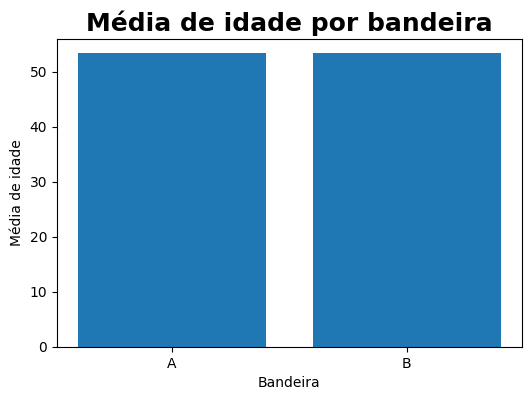

In [85]:
fig = plt.figure(figsize=(6,4))

plt.bar(agg_idade_bandeira["bandeira"],agg_idade_bandeira["idade"])

plt.title("Média de idade por bandeira", loc="center", fontsize=18, fontweight="bold")
plt.xlabel("Bandeira")
plt.ylabel("Média de idade")

plt.show()

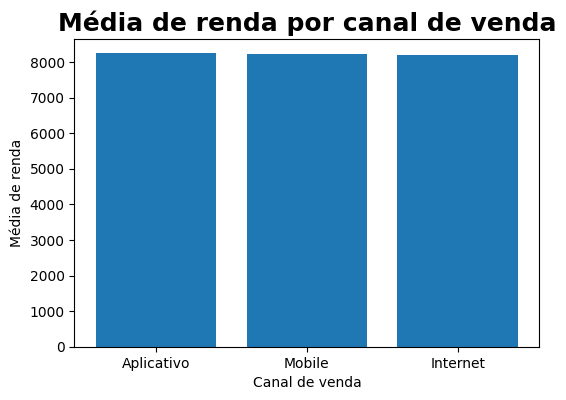

In [86]:
fig = plt.figure(figsize=(6,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"])

plt.title("Média de renda por canal de venda", loc="center", fontsize=18, fontweight="bold")
plt.xlabel("Canal de venda")
plt.ylabel("Média de renda")

plt.show()

In [89]:
vendas_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
vendas_por_data.head()

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198


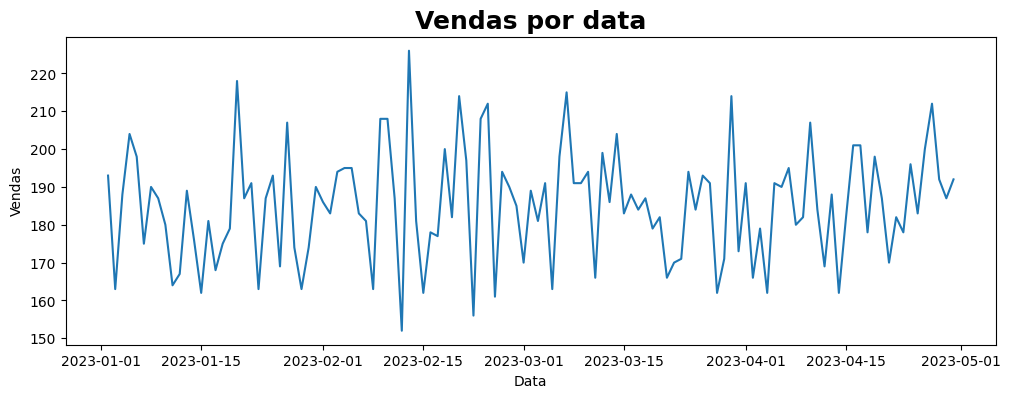

In [95]:
fig = plt.figure(figsize=(12,4))

plt.plot(vendas_por_data["Data"], vendas_por_data["idcompra"])
plt.title("Vendas por data", loc="center", fontsize=18, fontweight="bold")
plt.xlabel("Data")
plt.ylabel("Vendas")

plt.show()



In [96]:
agg_dpt_preco =round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dpt_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


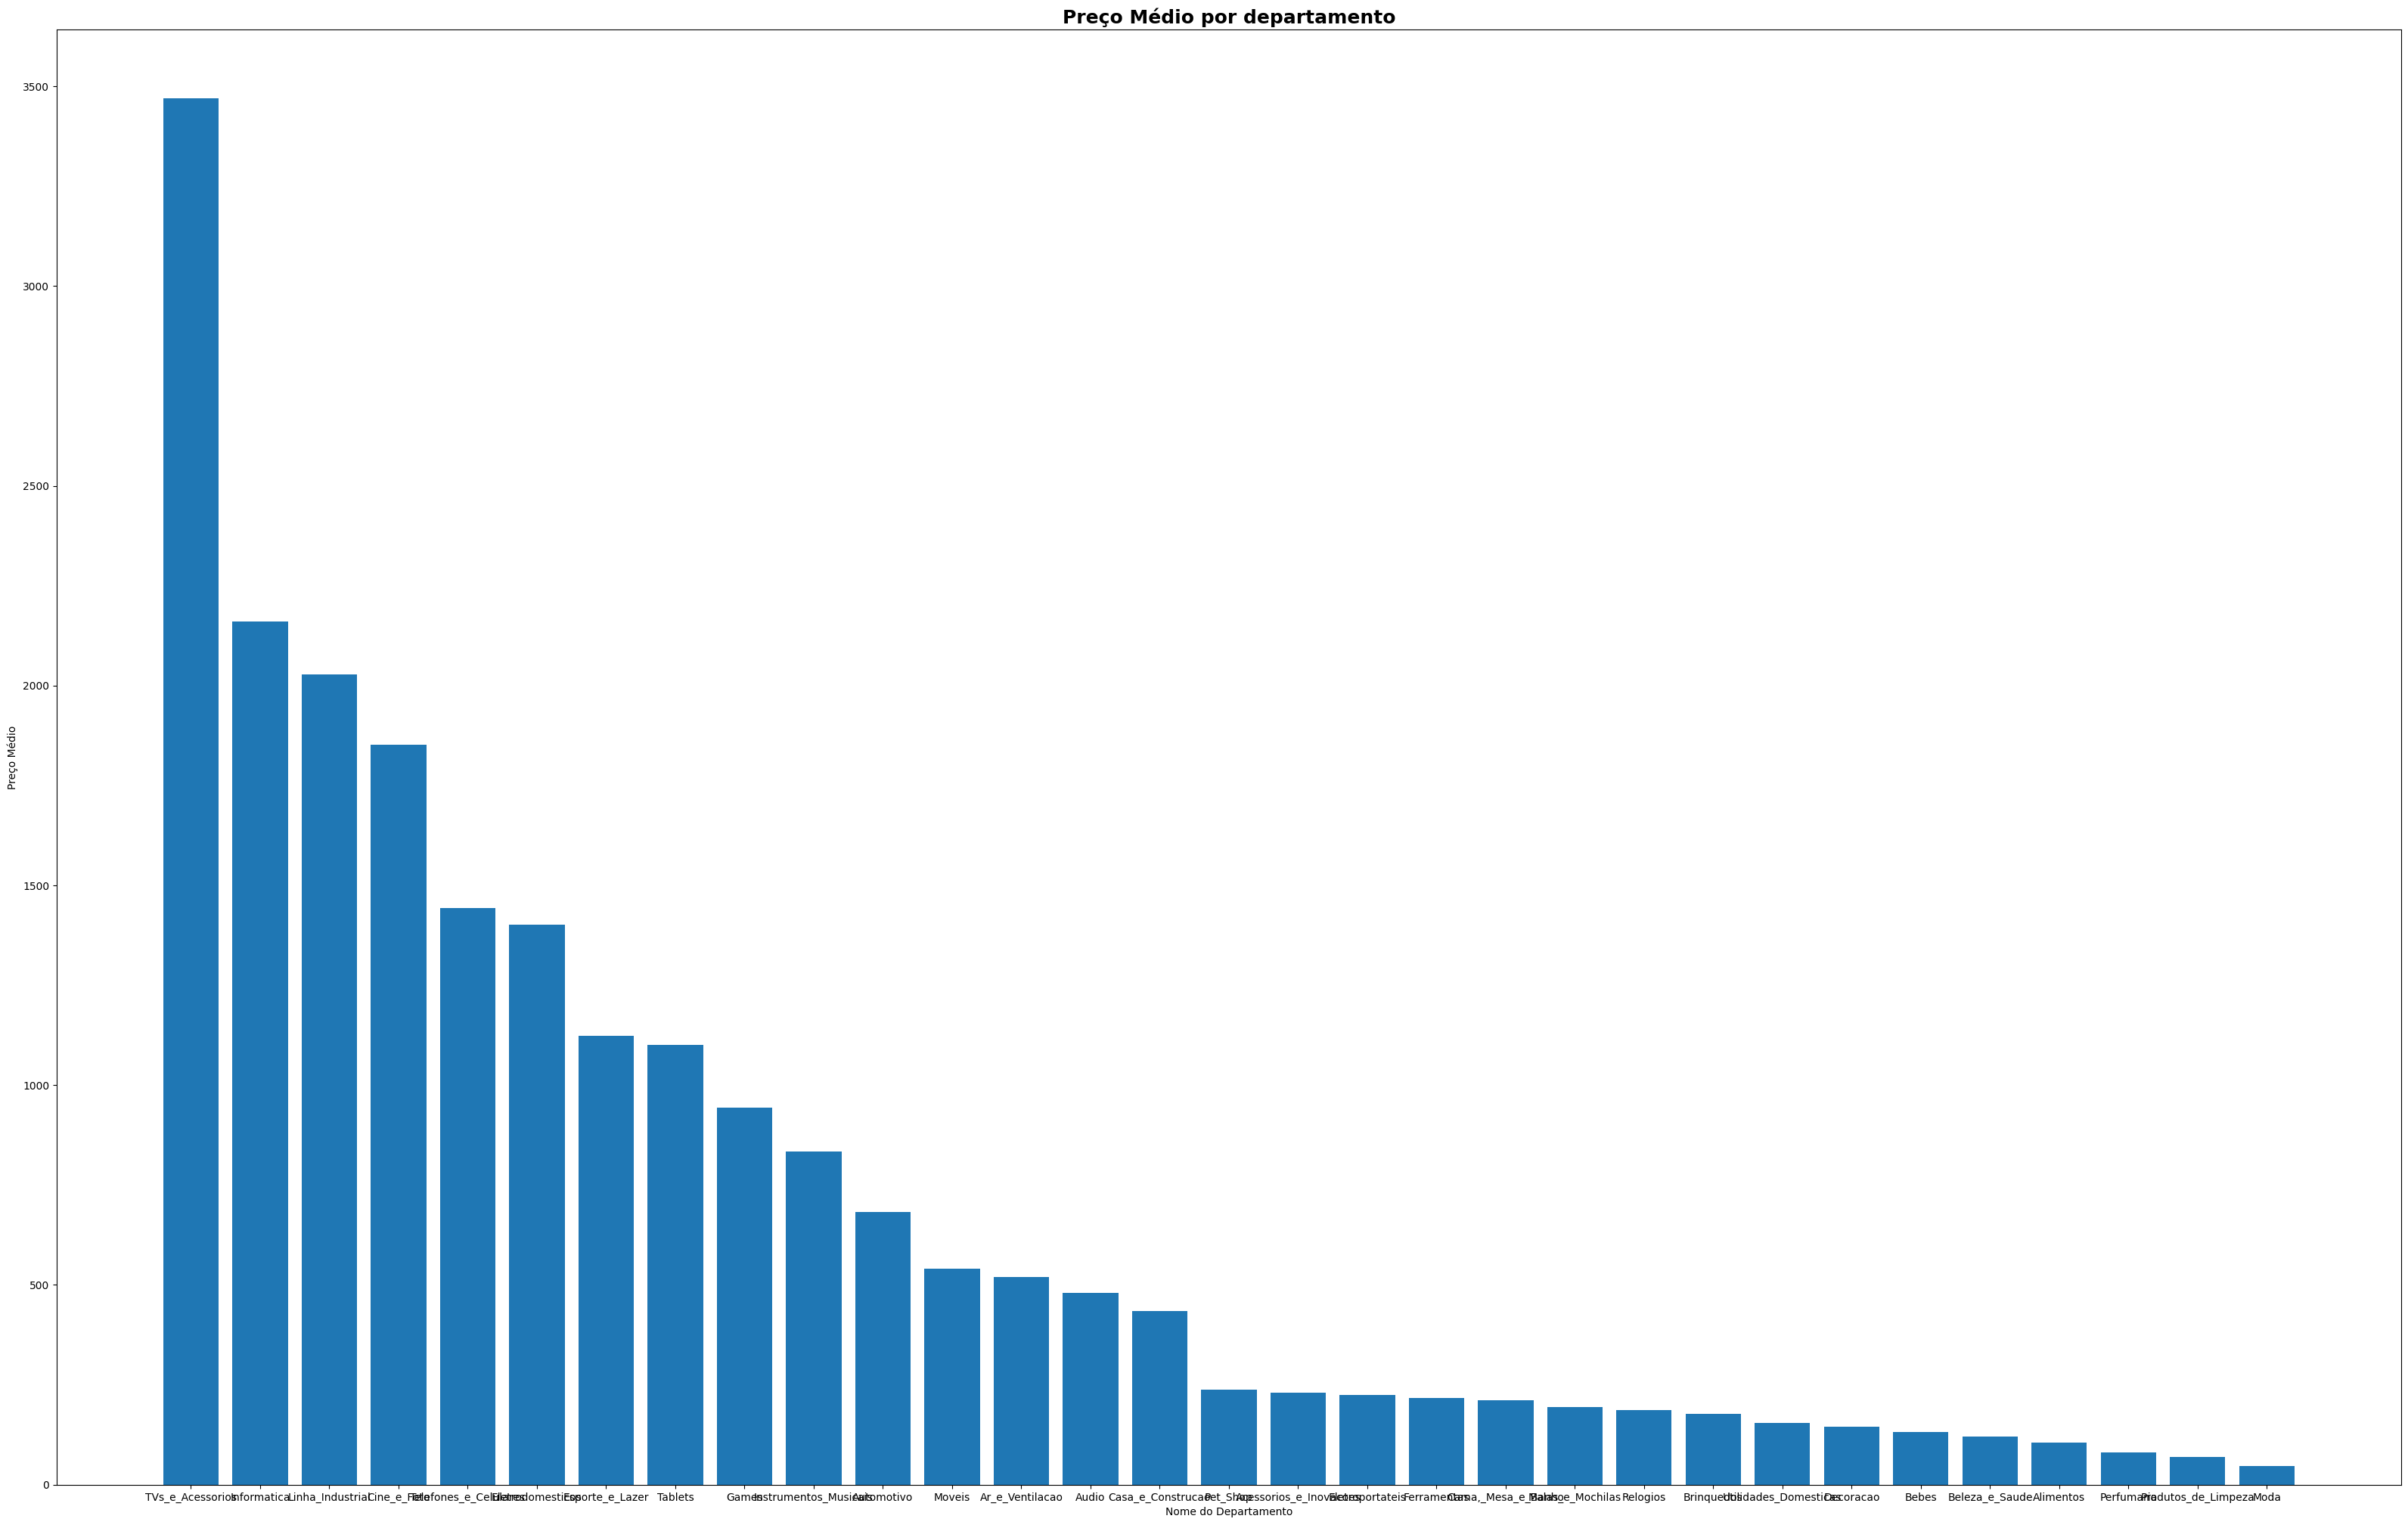

In [105]:
fig = plt.figure(figsize=(40,25))

plt.bar(agg_dpt_preco["Nome_Departamento"], agg_dpt_preco["Preço_com_frete"])

plt.title("Preço Médio por departamento", loc="center", fontsize=18, fontweight="bold")
plt.xlabel("Nome do Departamento")
plt.ylabel("Preço Médio")

plt.show()

### Instalando a biblioteca Plotly, Cufflinks e Chart_Studio

In [108]:
%pip install plotly
%pip install cufflinks
%pip install chart_studio

### Importando as bibliotecas que foram instaladas

In [109]:
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px


In [116]:
px.bar(agg_idade_bandeira, x='bandeira', y='idade')

In [117]:
px.line(vendas_por_data, x='Data', y='idcompra')

In [118]:
px.bar(agg_dpt_preco, x='Nome_Departamento', y='Preço_com_frete')